## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [ ]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

In [1]:
import pandas as pd
import numpy as np

In [11]:
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt  -P ~/data/

--2020-11-30 12:54:08--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.68.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.68.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/xvjzaxzz3ysphme/data_000637.txt [segue]
--2020-11-30 12:54:09--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc6bfba008304325507450924307.dl.dropboxusercontent.com/cd/0/inline/BEJ7nzJRsp6q0qjR9dJwYXeSKTLU1NH6wq6v1OjE-MmfP0QwDNCkKsCvIE0e1FmMZdABZunjWZ394_gmVL-rrQXdbImO8cKCHmF14iaUWl5vPTBnliaxOO0cuMJPZyiMfPE/file# [segue]
--2020-11-30 12:54:09--  https://uc6bfba008304325507450924307.dl.dropboxusercontent.com/cd/0/inline/BEJ7nzJRsp6q0qjR9dJwYXeSKTLU1NH6wq6v1OjE-MmfP0QwDNCkKsCvIE0e1FmMZdABZunjWZ394_gmVL-rrQXdbImO8cKCHmF14iaU

In [2]:
#1.
data=pd.read_csv('/Users/claudianegrato/data/data_000637.txt')

data=pd.DataFrame(data)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


In [3]:
#2.
x=data['BX_COUNTER'].max()+1 #don't count the min because it is equal to 0, add +1 to get better precision since the count startd from 0
print("The maximum BX_COUNTER is:", x)

The maximum BX_COUNTER is: 3564


In [4]:
#3.
start=np.amin(data['ORBIT_CNT']*x*25+data['BX_COUNTER']*25+data['TDC_MEAS']*25/30)
stop=np.amax(data['ORBIT_CNT']*x*25+data['BX_COUNTER']*25+data['TDC_MEAS']*25/30)

time=stop-start
print('The data acquisition time lasted:', time*1e-9, 's')

The data acquisition time lasted: 0.9804162533125 s


In [5]:
#4.
data['TIME_ns']=data['ORBIT_CNT']*x*25+data['BX_COUNTER']*25+data['TDC_MEAS']*25/30
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME_ns
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14
1310717,1,0,64,3869211171,764,0,3.447467e+14
1310718,1,0,139,3869211171,769,0,3.447467e+14


In [6]:
#5.
data['HEAD']=np.random.randint(2, size=len(data))
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME_ns
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,0,0,63,3869200167,2553,28,3.447457e+14
3,0,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
1310715,0,0,62,3869211171,762,14,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14
1310717,0,0,64,3869211171,764,0,3.447467e+14
1310718,0,0,139,3869211171,769,0,3.447467e+14


In [7]:
#6.
new_data=data[data['HEAD'] == 1]
new_data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME_ns
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
5,1,0,63,3869200167,2762,4,3.447457e+14
6,1,0,61,3869200167,2772,14,3.447457e+14
...,...,...,...,...,...,...,...
1310710,1,1,36,3869211171,427,13,3.447467e+14
1310711,1,1,39,3869211171,430,0,3.447467e+14
1310712,1,1,35,3869211171,429,4,3.447467e+14
1310713,1,0,64,3869211171,758,18,3.447467e+14


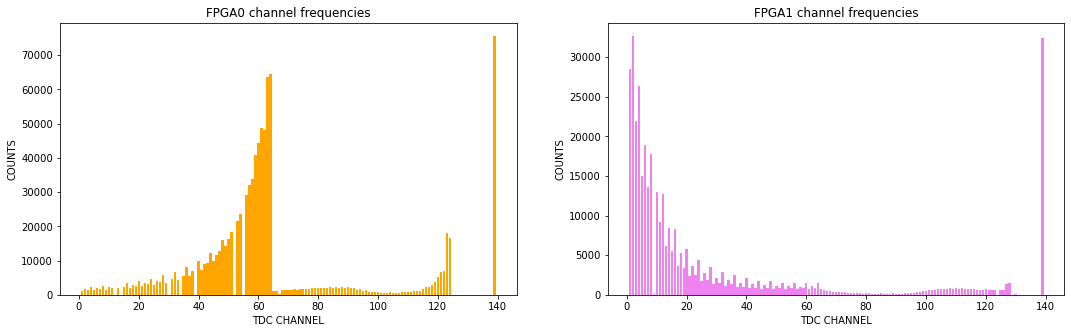

In [8]:
#7.
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,5))


#FPGA0 plot
FPGA0 = data[data['FPGA']==0].groupby('TDC_CHANNEL')[['TDC_MEAS']].count()
ax1.bar(FPGA0.index, FPGA0['TDC_MEAS'], color='orange') 
ax1.set_title('FPGA0 channel frequencies')
ax1.set_xlabel('TDC CHANNEL')
ax1.set_ylabel('COUNTS')

#FPGA1 plot
FPGA1 = data[data['FPGA']==1].groupby('TDC_CHANNEL')[['TDC_MEAS']].count()
ax2.bar(FPGA1.index, FPGA1['TDC_MEAS'], color='violet') 
ax2.set_title('FPGA1 channel frequencies')
ax2.set_xlabel('TDC CHANNEL')
ax2.set_ylabel('COUNTS');

In [9]:
#8.
maxcounts=data.groupby(['FPGA','TDC_CHANNEL']).size() # it's a Series!
print('The top 3 channels with most counts for FPGA0 are: ','\n',maxcounts.loc[0].nlargest(3), '\n')
print('The top 3 channels with most counts for FPGA1 are: ','\n',maxcounts.loc[1].nlargest(3))

The top 3 channels with most counts for FPGA0 are:  
 TDC_CHANNEL
139    75617
64     64581
63     63724
dtype: int64 

The top 3 channels with most counts for FPGA1 are:  
 TDC_CHANNEL
2      32669
139    32442
1      28438
dtype: int64


In [10]:
#9.
orbit_counts=data.groupby(['FPGA','ORBIT_CNT']).size()
print('The unique orbit count for FPGA0 is:',orbit_counts.loc[0].size)
print('The unique orbit count for FPGA1 is:',orbit_counts.loc[1].size, '\n')

orbit_counts_139 = data[data['TDC_CHANNEL'] == 139].groupby(['FPGA','ORBIT_CNT']).size()
print('The unique orbit count for FPGA0 with TDC_CHANNEL=139 is:',orbit_counts_139.loc[0].size)
print('The unique orbit count for FPGA1 with TDC_CHANNEL=139 is:',orbit_counts_139.loc[1].size)

The unique orbit count for FPGA0 is: 11001
The unique orbit count for FPGA1 is: 10984 

The unique orbit count for FPGA0 with TDC_CHANNEL=139 is: 10961
The unique orbit count for FPGA1 with TDC_CHANNEL=139 is: 10381
